<a href="https://colab.research.google.com/github/Arnieboii11/Agrix-Agrotech---PS1/blob/main/Agrix_Group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agrix Group-2 

**Project: CREATING AN ALGORITHM IN PYTHON TO EXTRACT THE FIELD PLOTS AND GET THE  AREA, SHAPE, LOCATION, AND TIME OF CULTIVATION USING THE DATA SHEET OF COORDINATES GENERATED BY A GPS TRACKING DEVICE.**

Data Analysis:
Fetching the Data from the Excel Sheet

Read Data into Python from CSV file:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import csv
import math
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point
data = pd.read_excel(r"/content/drive/MyDrive/Agrix/System_Log_Detail_05-04-2022_05-48-10_PM.xlsx")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 52.2 MB/s 
     |████████████████████████████████| 16.7 MB 450 kB/s 


Showing the output of df:

In [3]:
print(data.head)

<bound method NDFrame.head of                                       System Log Detail Unnamed: 1 Unnamed: 2  \
0     Acuman-Acuman-BH001ASH001-357445100060090 from...        NaN        NaN   
1                                                   NaN        NaN        NaN   
2                                                   NaN        NaN        NaN   
3                                              Latitude  Longitude        IGN   
4                                             253740578  860897333        Off   
...                                                 ...        ...        ...   
3830                                          253478489  861002578         On   
3831                                          253478533  861002578         On   
3832                                          253478467  861002756         On   
3833                                          253478444  861002756         On   
3834                                          253478556  861002756         On  

Getting header data:

In [4]:
header = data.iloc[0,0]
print(header)

latitudeArray = []
latArr1=[]
longArr1=[]
longitudeArray = []
DataActualTime = []
DataReceivedTime = []
DataActualTimeEpoch = []
SpeedArray = []


for i in range(4, 3835):
  latitudeArray.append(int(data.iloc[i][0])/(10**7))
  longitudeArray.append(int(data.iloc[i][1])/(10**7))
  DataActualTime.append(datetime.datetime.strptime(data.iloc[i][8], '%d-%m-%Y %H:%M:%S'))
  DataReceivedTime.append(datetime.datetime.strptime(data.iloc[i][9], '%d-%m-%Y %H:%M:%S'))  
  SpeedArray.append(int(data.iloc[i][6]))

for elem in DataActualTime:
  DataActualTimeEpoch.append(elem.timestamp())

arrayLen = len(latitudeArray)

for i in range(1, arrayLen):
  if(latitudeArray[i]!=latitudeArray[i-1]) or (longitudeArray[i]!=longitudeArray[i-1]):
    latArr1.append(latitudeArray[i])
    longArr1.append(longitudeArray[i])
    
  

Acuman-Acuman-BH001ASH001-357445100060090 from 05-04-2022  00:00 to 05-04-2022  17:47


Checking for anomalies in Actual time vs Received time:



In [5]:
dateDiffArray = list(abs(np.array(DataActualTime)- np.array(DataReceivedTime)))

Displaying the data as a geoPlot:

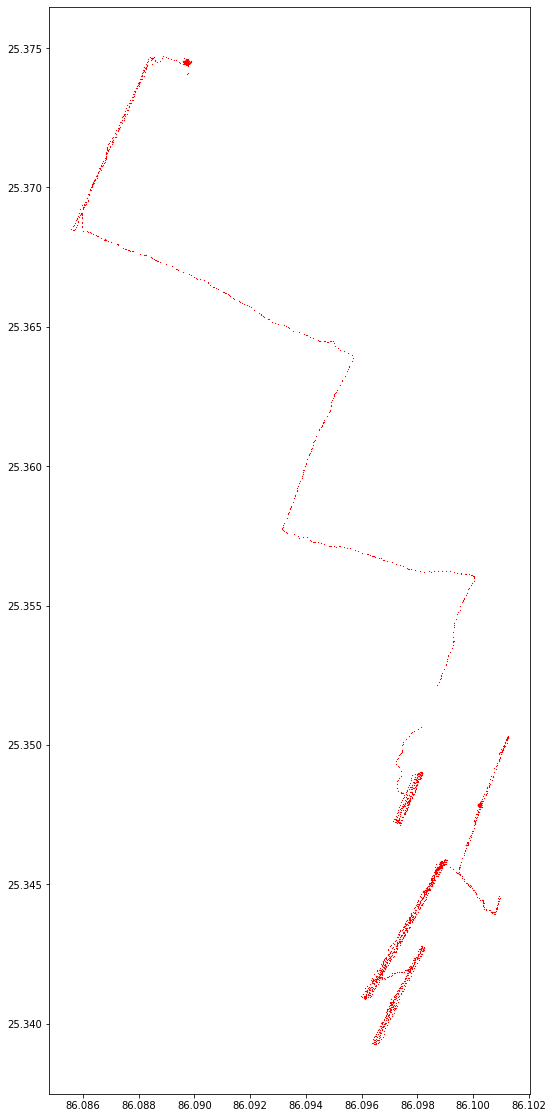

In [6]:
geometry = [Point(xy) for xy in zip(longArr1,latArr1)]
geo_df = gpd.GeoDataFrame(geometry= geometry)
g = geo_df.plot(markersize = 0.1, color = 'red',marker = '*', figsize = (20,20))


Implementing DBSCAN clustering algorithm:


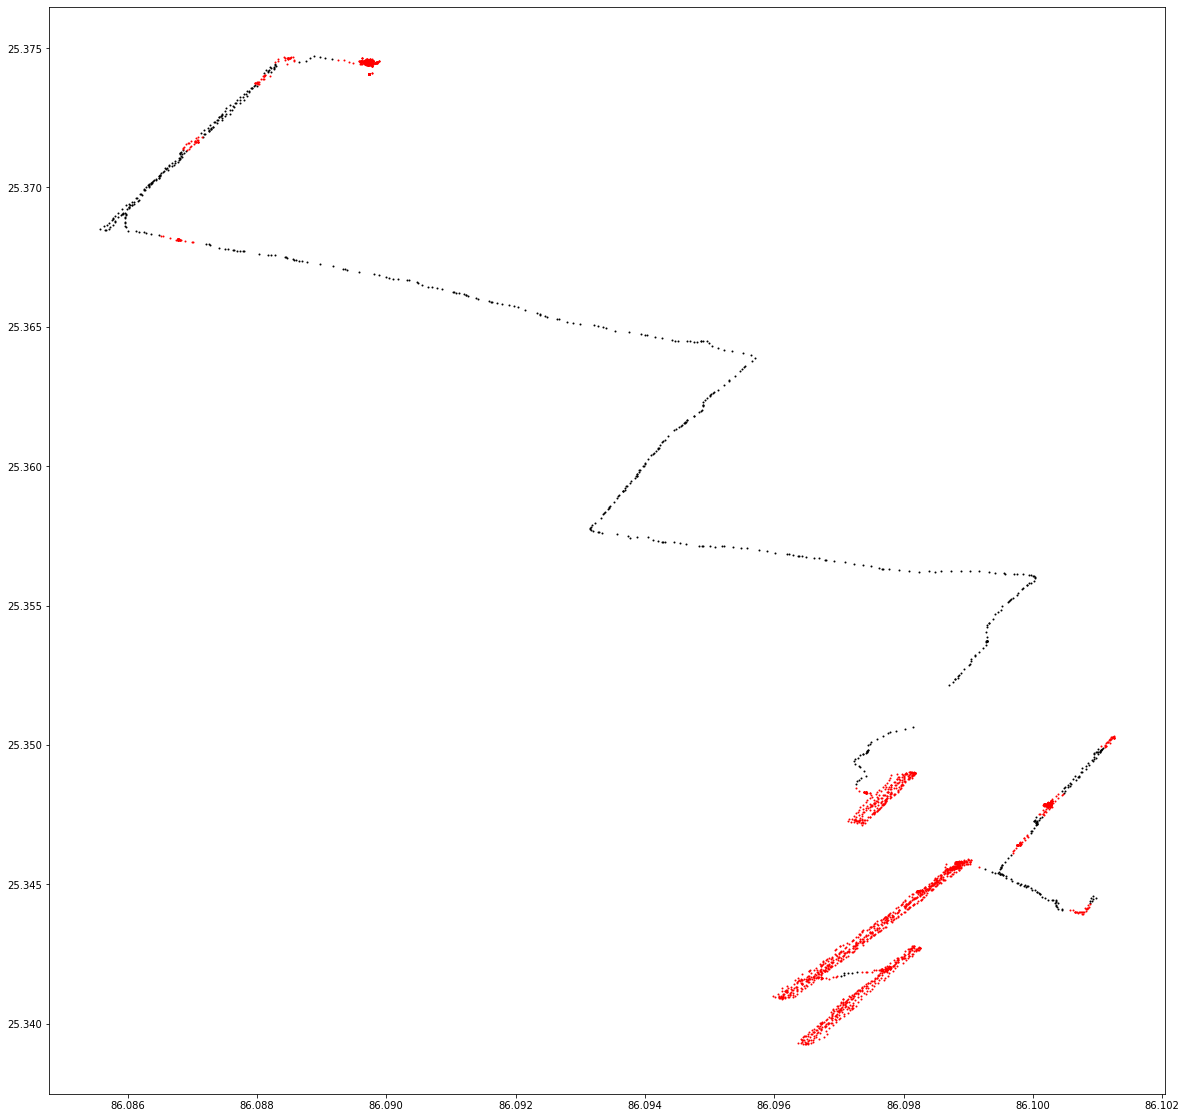

In [7]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.mixture import GaussianMixture

scikitArray = []
for i in range (0, arrayLen):
  coordinates = []
  coordinates.append(latitudeArray[i])
  coordinates.append(longitudeArray[i])
  coordinates.append(DataActualTimeEpoch[i]/10**8)

  scikitArray.append(coordinates)

GmmscikitArr = scikitArray
db = DBSCAN(eps=0.0002, min_samples=22).fit(scikitArray)
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
 
# Number of clusters in labels
uniqueLabels = set(labels)

#Seperating the noise and the non-noise datapoints
noiseArray = []
nonnoiseArray = []

for i in range(len(labels)):
  if labels[i] == -1:
    list1 = []
    list1.append(latitudeArray[i])
    list1.append(longitudeArray[i])
    noiseArray.append(list1)
  else:
    list1 = []
    list1.append(latitudeArray[i])
    list1.append(longitudeArray[i])
    nonnoiseArray.append(list1)

plt.figure(figsize = (20,20))
plt.scatter([x[1] for x in noiseArray], [x[0] for x in noiseArray], c = 'k', s = 1)
plt.scatter([x[1] for x in nonnoiseArray], [x[0] for x in nonnoiseArray], c = 'r', s = 1)
plt.plot()
plt.show()

Seperating the unique plots, and displaying them with colour codes:

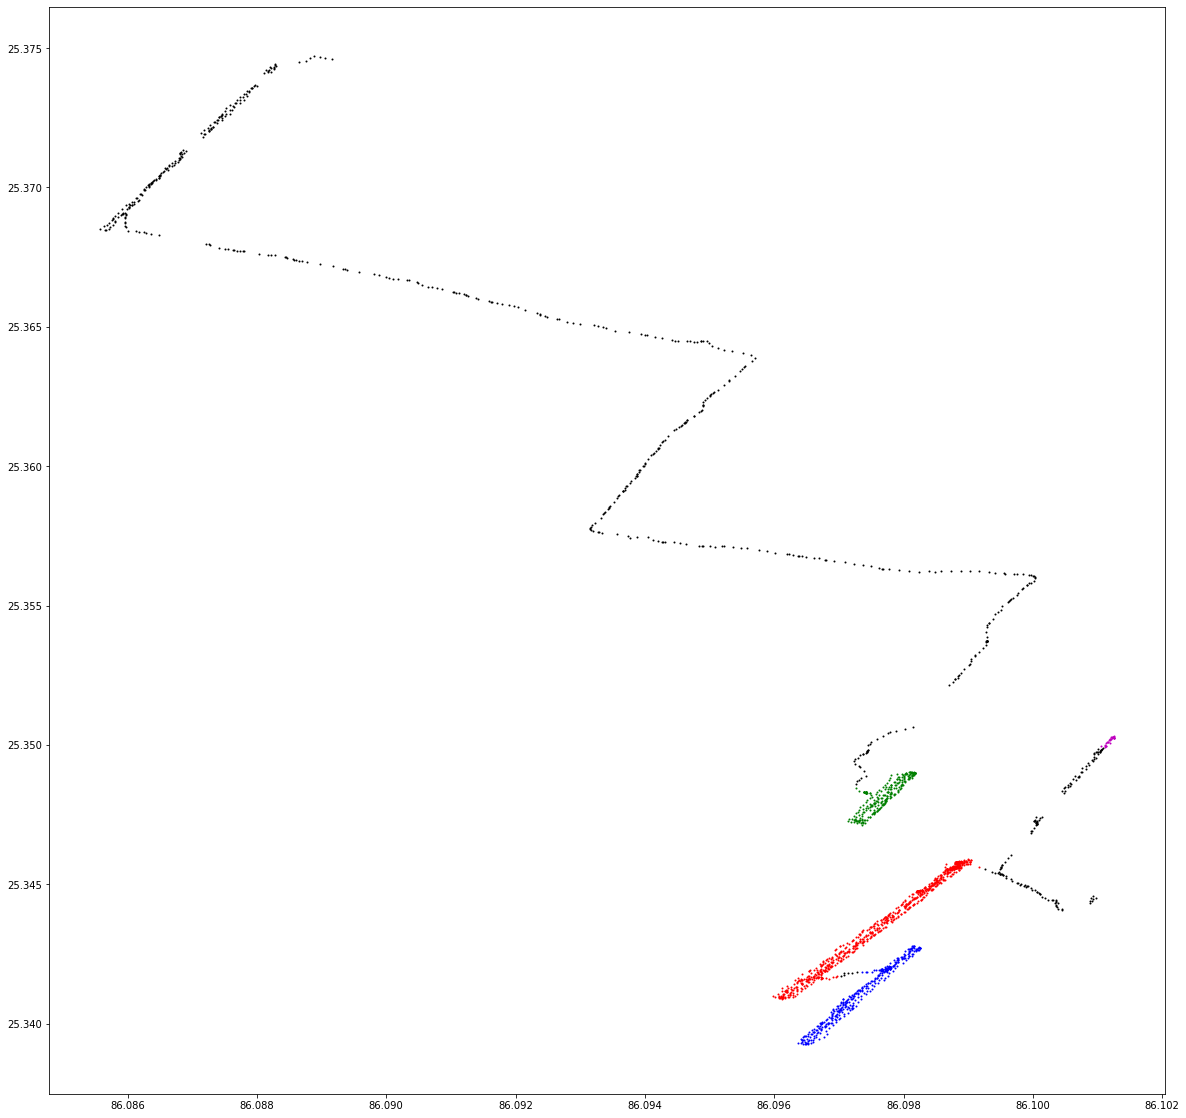

In [8]:
from collections import defaultdict
example_dictionary = defaultdict(list)

for i in range(len(scikitArray)):
  example_dictionary[labels[i]].append(scikitArray[i])

plt.figure(figsize = (20,20))
plt.scatter(list(list(zip(*example_dictionary[6]))[1]), list(list(zip(*example_dictionary[6]))[0]), c = 'g', s = 1)
plt.scatter(list(list(zip(*example_dictionary[7]))[1]), list(list(zip(*example_dictionary[7]))[0]), c = 'r', s = 1)
plt.scatter(list(list(zip(*example_dictionary[-1]))[1]), list(list(zip(*example_dictionary[-1]))[0]), c = 'k', s = 1)
plt.scatter(list(list(zip(*example_dictionary[8]))[1]), list(list(zip(*example_dictionary[8]))[0]), c = 'b', s = 1)
plt.scatter(list(list(zip(*example_dictionary[12]))[1]), list(list(zip(*example_dictionary[12]))[0]), c = 'm', s = 1)

plt.plot()
plt.show()

Displaying the number of points per key in dictionary

In [9]:
for new_k, new_val in example_dictionary.items():
    print(new_k, len([item for item in new_val if item]))

0 187
1 819
-1 679
4 22
2 22
3 28
5 40
6 265
7 879
8 375
9 25
10 44
11 418
12 28


Calculating Area of the plots

In [10]:
def haversine(x):
    return (1.0 - math.cos(x))/2.0

In [11]:
def polyarea(lats, lons, algorithm = 0, radius = 6378137):
    
    from numpy import arctan2, cos, sin, sqrt, pi, power, append, diff, deg2rad
    lats = np.deg2rad(lats)
    lons = np.deg2rad(lons)

    if lats[0]!=lats[-1]:
        lats = append(lats, lats[0])
        lons = append(lons, lons[0])

    a = sin(lats/2)**2 + cos(lats)* sin(lons/2)**2
    colat = 2*arctan2( sqrt(a), sqrt(1-a) )
  
    az = arctan2(cos(lats) * sin(lons), sin(lats)) % (2*pi)
  
    daz = diff(az)
    daz = (daz + pi) % (2 * pi) - pi

    deltas=diff(colat)/2
    colat=colat[0:-1]+deltas
  
    integrands = (1-cos(colat)) * daz
 
    area = abs(sum(integrands))/(4*pi)

    area = min(area,1-area)
    if radius is not None:
        return area * 4*pi*radius**2
    else: 
        return area

For calculating the convex hull of the polygon

In [12]:
def convex_hull(points):
    
    points = sorted(set(points))

    if len(points) <= 1:
        return points

    def cross(o, a, b):
        return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])
 
    lower = []
    for p in points:
        while len(lower) >= 2 and cross(lower[-2], lower[-1], p) <= 0:
            lower.pop()
        lower.append(p)

    upper = []
    for p in reversed(points):
        while len(upper) >= 2 and cross(upper[-2], upper[-1], p) <= 0:
            upper.pop()
        upper.append(p)

    return lower[:-1] + upper[:-1]

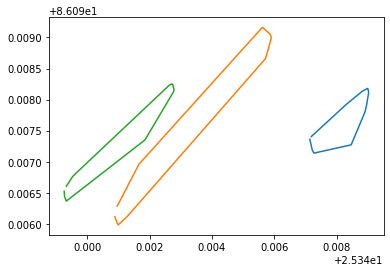

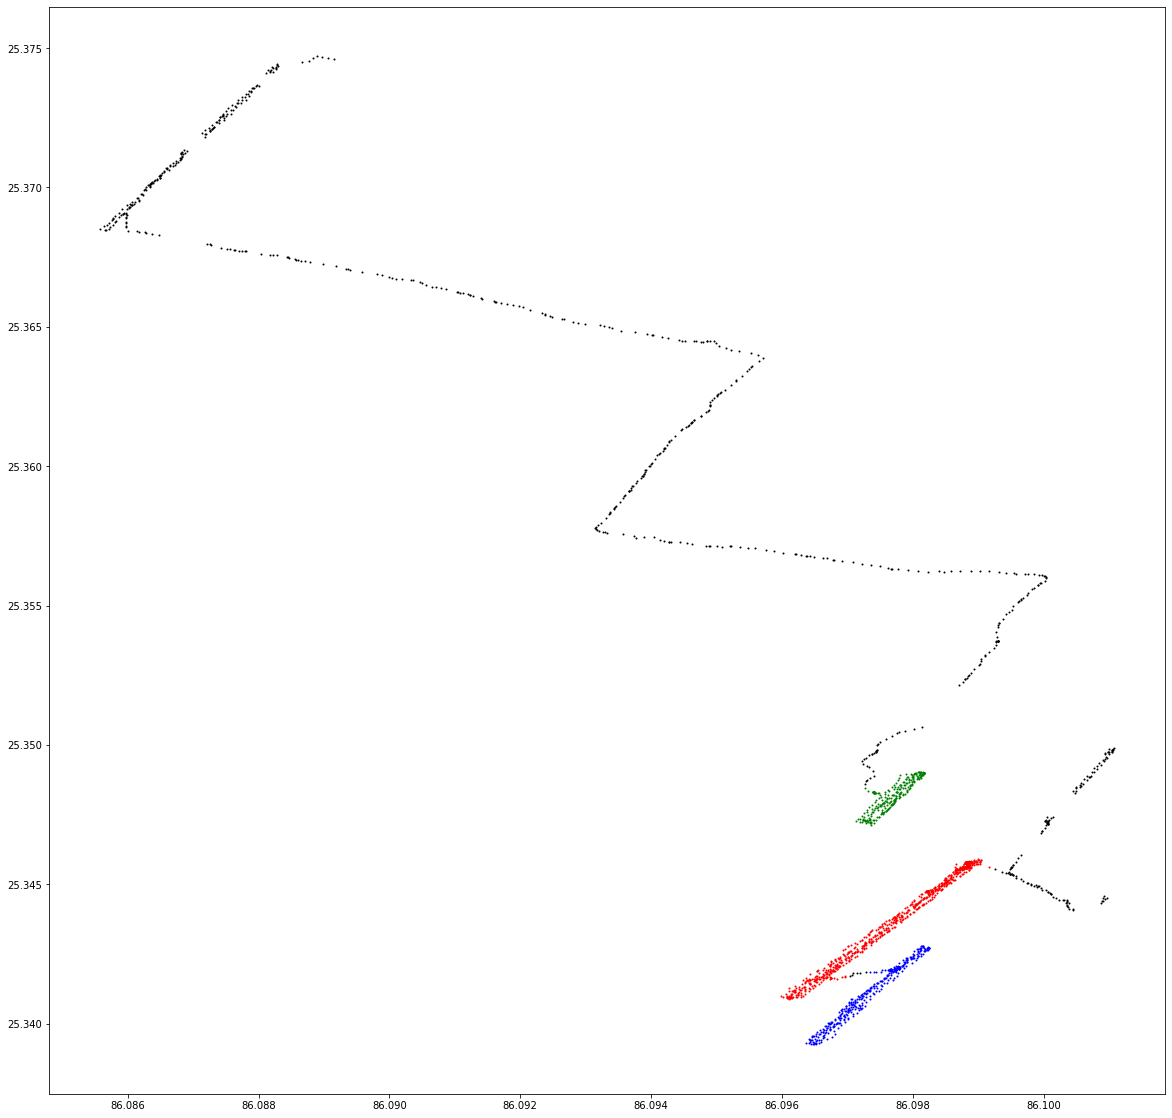

In [19]:
plot_area={}
reqPlots = [6, 7, 8]
for key in example_dictionary.keys():
  con_hull=[]
  merged_list=[]
  new_lat=[]
  new_lon=[] 
  if(key==-1):
    continue
  a=np.array(example_dictionary[key])
  if(True):
    z=[]
    x=[]
    y=[]
    for i in range(len(a)):
      new_lat.append(a[i,0])
      new_lon.append(a[i,1])
    merged_list = tuple(zip(new_lat,new_lon))
    con_hull = convex_hull(merged_list)
    for item in con_hull:
      z.append(list(item))
    for j in range(len(z)):
      x.append(z[j][0])
      y.append(z[j][1])
    if key in reqPlots:
      plt.plot(x, y)
    area = polyarea(x,y) #area calculated will be in km^2
    plot_area[key]=area/10**6
plt.figure(figsize = (20,20))
plt.scatter(list(list(zip(*example_dictionary[6]))[1]), list(list(zip(*example_dictionary[6]))[0]), c = 'g', s = 1)
plt.scatter(list(list(zip(*example_dictionary[7]))[1]), list(list(zip(*example_dictionary[7]))[0]), c = 'r', s = 1)
plt.scatter(list(list(zip(*example_dictionary[-1]))[1]), list(list(zip(*example_dictionary[-1]))[0]), c = 'k', s = 1)
plt.scatter(list(list(zip(*example_dictionary[8]))[1]), list(list(zip(*example_dictionary[8]))[0]), c = 'b', s = 1)
plt.show()

{0, 1, 2}
1149 2221 461


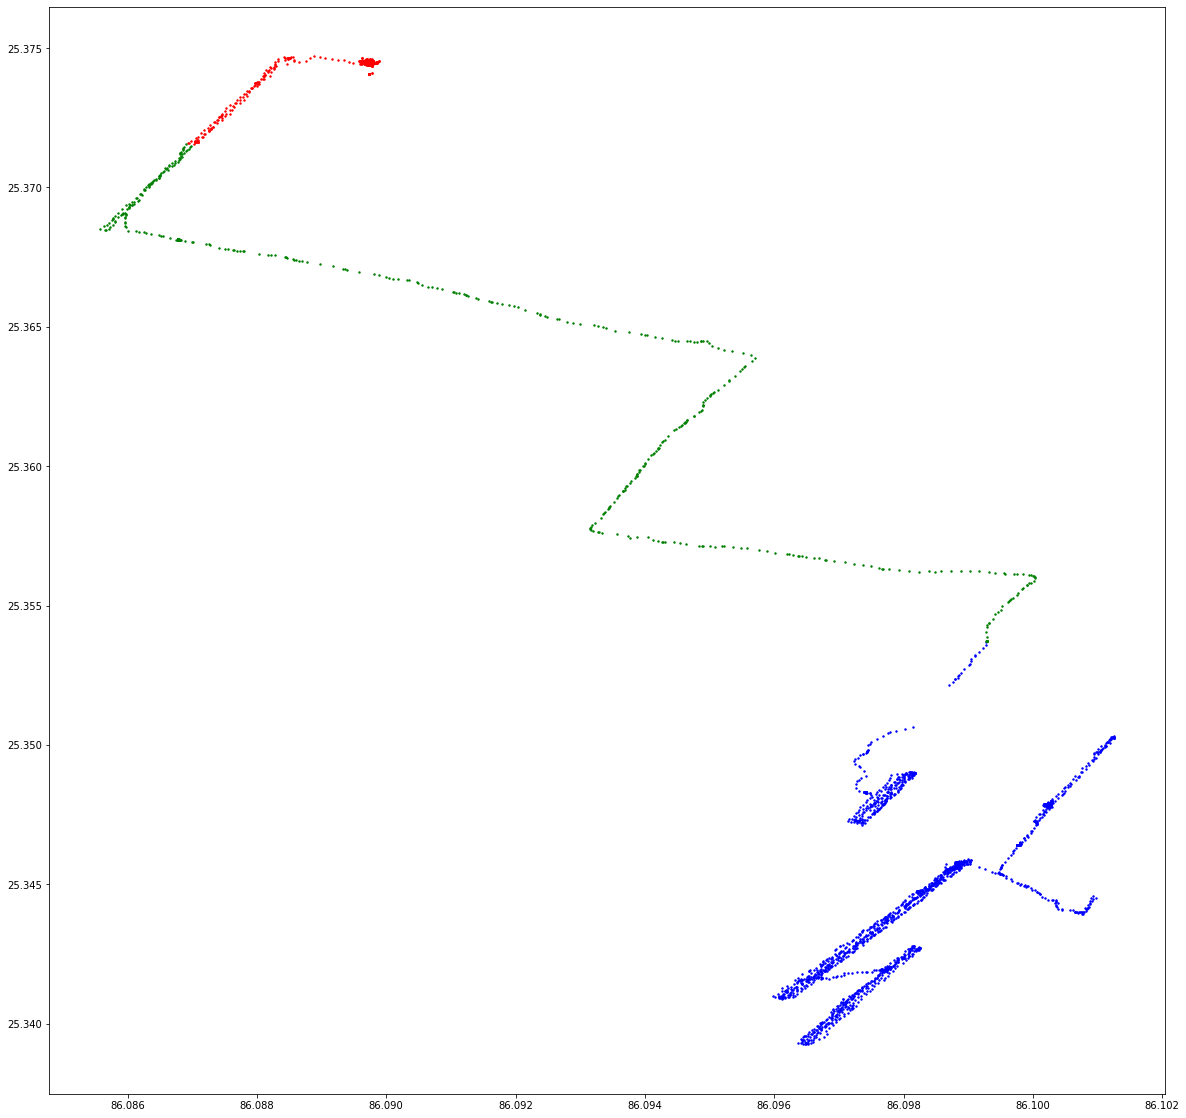

In [14]:
#-------------------------------Gaussian Mixture
#Gaussian Mixture:
gmm = GaussianMixture(n_components = 3).fit(GmmscikitArr) 
GmmLabels = gmm.predict(GmmscikitArr)
dict1 = {}
dict1['labels'] = GmmLabels
print(set(dict1['labels']))

gmmD0Arr = []
gmmD1Arr = []
gmmD2Arr = []
gmmD3Arr = []
gmmD4Arr = []

for i in range(len(dict1['labels'])):
  if dict1['labels'][i] == 0:
    list1 = []
    list1.append(latitudeArray[i])
    list1.append(longitudeArray[i])
    gmmD0Arr.append(list1)
  elif dict1['labels'][i] == 1:
    list1 = []
    list1.append(latitudeArray[i])
    list1.append(longitudeArray[i])
    gmmD1Arr.append(list1)
  elif dict1['labels'][i] == 2:
    list1 = []
    list1.append(latitudeArray[i])
    list1.append(longitudeArray[i])
    gmmD2Arr.append(list1)

print(len(gmmD0Arr),len(gmmD1Arr), len(gmmD2Arr), end = '\n')
plt.figure(figsize = (20,20))
plt.scatter([x[1] for x in gmmD0Arr], [x[0] for x in gmmD0Arr], c ='r', s = 2)
plt.scatter([x[1] for x in gmmD1Arr], [x[0] for x in gmmD1Arr], c ='blue', s = 2)
plt.scatter([x[1] for x in gmmD2Arr], [x[0] for x in gmmD2Arr], c ='g', s = 2)

plt.plot()
plt.show()

Removing static vehicle data by using speed:

In [15]:
'''for i in range(4, 3835):
  latitudeArray.append(int(data.iloc[i][0])/(10**7))
  longitudeArray.append(int(data.iloc[i][1])/(10**7))
  DataActualTime.append(datetime.datetime.strptime(data.iloc[i][8], '%d-%m-%Y %H:%M:%S'))
  DataReceivedTime.append(datetime.datetime.strptime(data.iloc[i][9], '%d-%m-%Y %H:%M:%S'))  
  SpeedArray.append(int(data.iloc[i][6])'''

#print(data.iloc[4:,[6]])
data_filtered = data[data.iloc[4:,[6]] != 0.0]



In [20]:
plot_area

{0: 1.1380082839146916e-06,
 1: 0.0010597824763648378,
 2: 0.1575065465554963,
 3: 0.0005895603231954291,
 4: 0.0005892377695544741,
 5: 9.230345833325205e-05,
 6: 0.010129208502665786,
 7: 0.03129987875416806,
 8: 0.01501455539181901,
 9: 0.0005662327884769917,
 10: 0.000286864510864113,
 11: 0.0010208477268904088,
 12: 0.0003165711937652488}